In [1]:
import pandas as pd
data = pd.read_csv("heart.csv")

In [2]:
# Display first few rows
print(data.head())

# Check data types
print(data.dtypes)

# Summary statistics
print(data.describe())


   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  
age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object
              age         sex          cp      trtbps        chol         fbs  \
count  303.000000 

In [3]:
data.shape

(303, 14)

In [13]:
data.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [7]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64


In [14]:
# Selecting only the numerical features
numerical_columns = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
numerical_data = data[numerical_columns]

# Displaying the first few rows of the numerical dataset
print(numerical_data.head())


   age  resting bp s  cholesterol  max heart rate  oldpeak
0   40           140          289             172      0.0
1   49           160          180             156      1.0
2   37           130          283              98      0.0
3   48           138          214             108      1.5
4   54           150          195             122      0.0


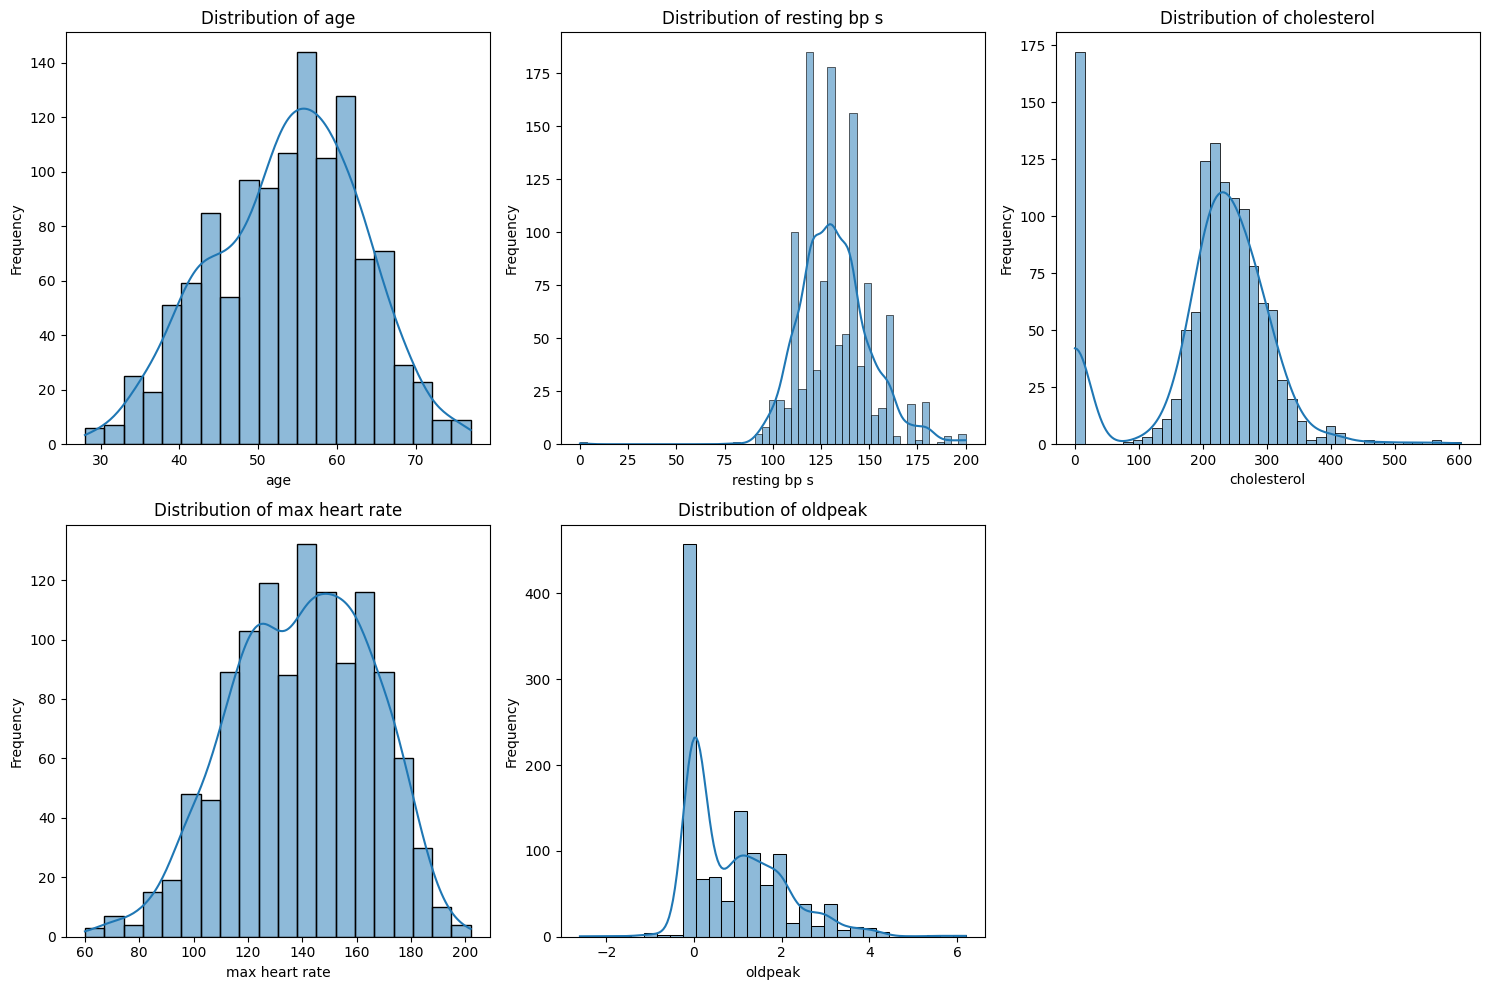

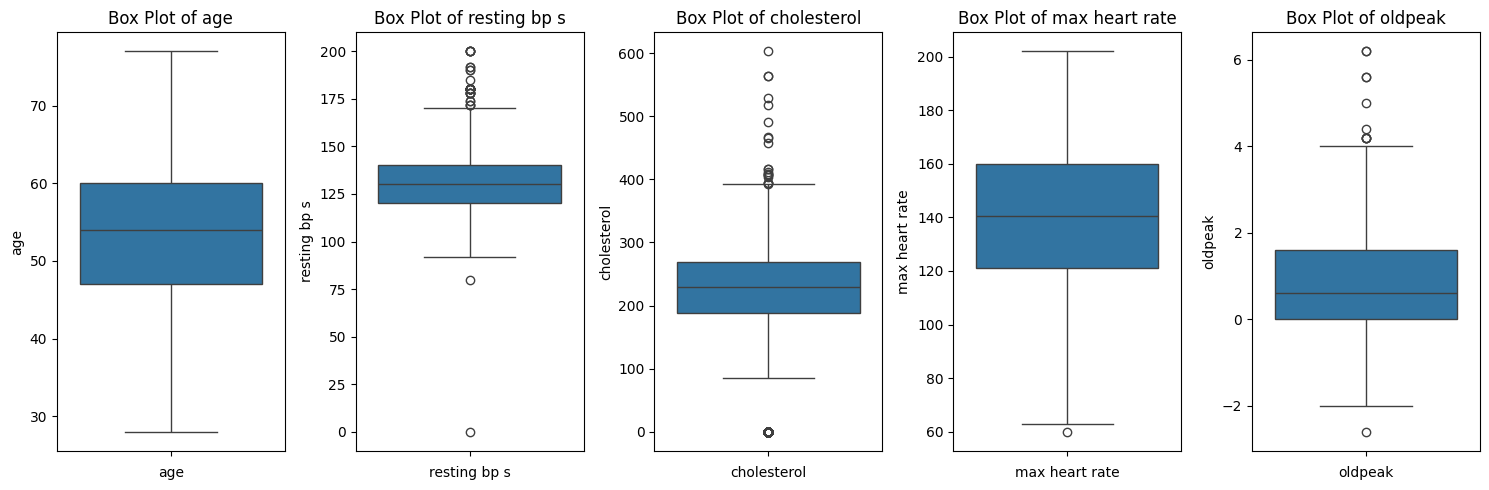

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_data.columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(numerical_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Box plots for numerical features
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_data.columns):
    plt.subplot(1, 5, i+1)
    sns.boxplot(numerical_data[feature])
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()


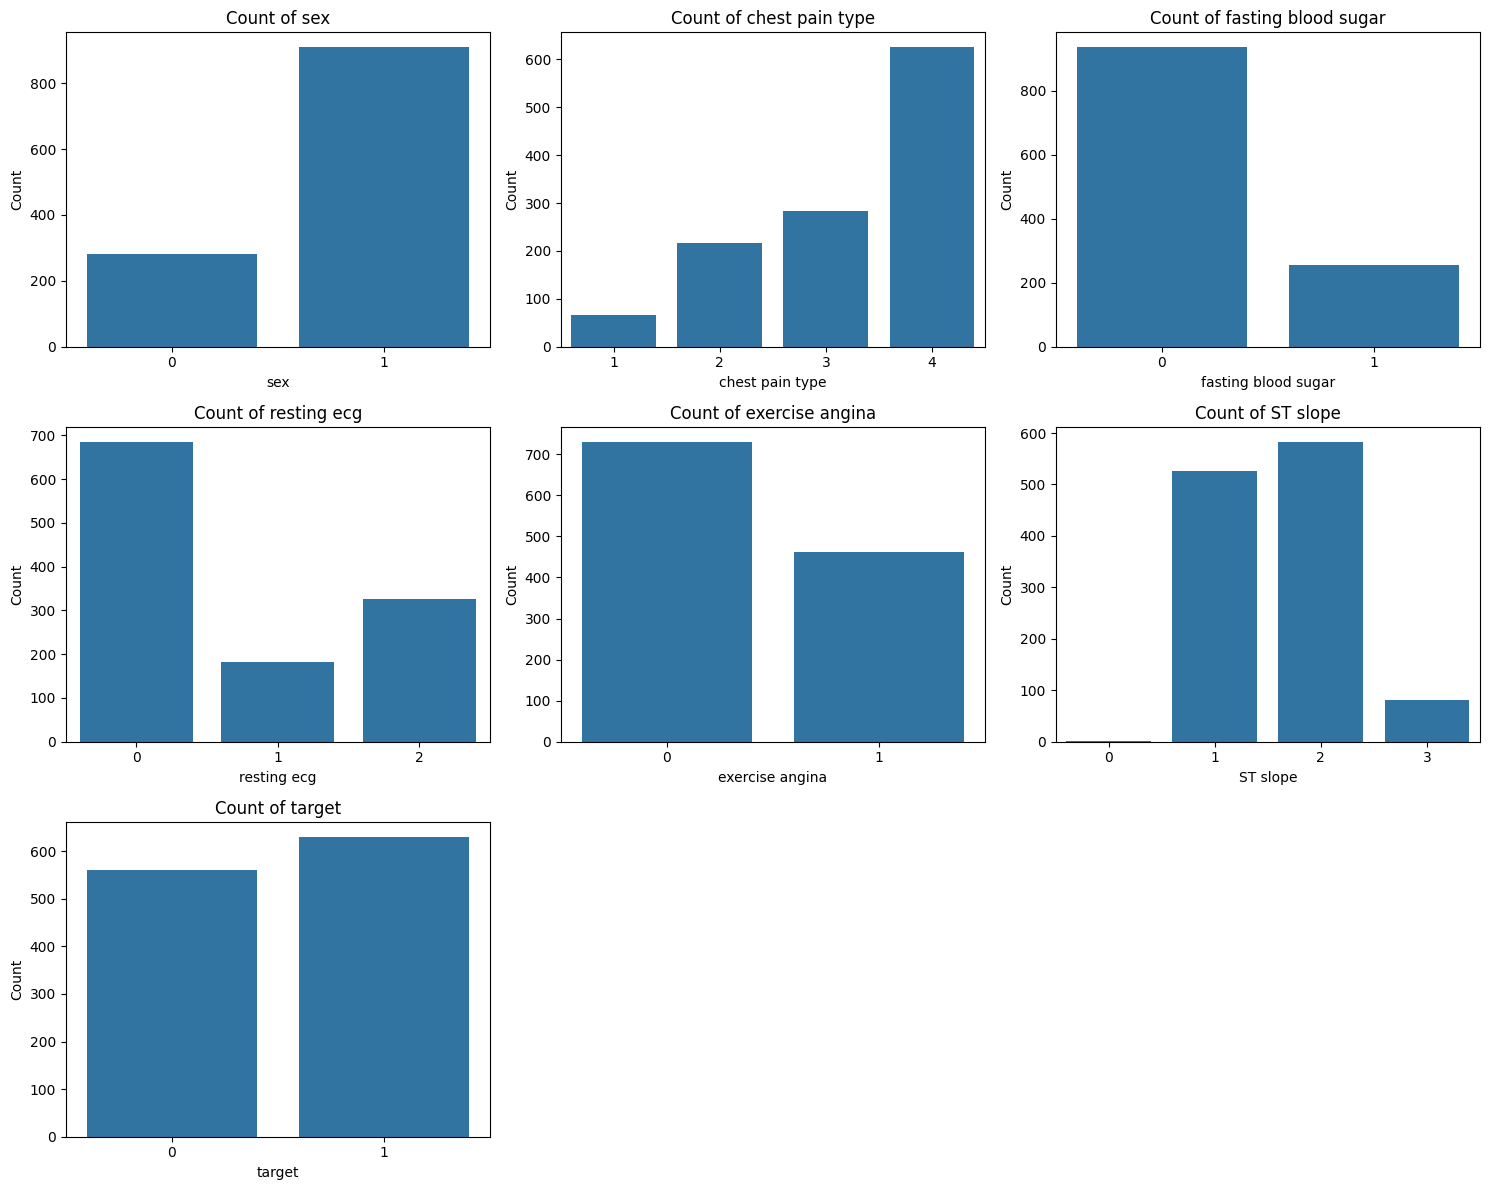

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting only the categorical features
categorical_columns = ['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg', 'exercise angina', 'ST slope', 'target']
categorical_data = data[categorical_columns]

# Count plots for categorical features
plt.figure(figsize=(15, 12))
for i, feature in enumerate(categorical_data.columns):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=feature, data=categorical_data)
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [17]:
# Check for zero values in specific columns
columns_to_check = ['resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
zero_values_specific = (data[columns_to_check] == 0).sum()

# Display columns with zero values
print("Columns with zero values:")
print(zero_values_specific[zero_values_specific > 0])


Columns with zero values:
resting bp s      1
cholesterol     172
oldpeak         455
dtype: int64


In [18]:
import numpy as np

# Define columns to replace zero values with median
columns_to_replace = ['resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

# Replace zero values with median
for column in columns_to_replace:
    median_value = data[column].median()
    data[column] = data[column].replace(0, median_value)

# Verify that zero values have been replaced with median
for column in columns_to_replace:
    zero_values_after_replace = (data[column] == 0).sum()
    print(f"Zero values after replacing in {column}: {zero_values_after_replace}")


Zero values after replacing in resting bp s: 0
Zero values after replacing in cholesterol: 0
Zero values after replacing in max heart rate: 0
Zero values after replacing in oldpeak: 0


In [8]:
data.dropna(inplace=True)

In [9]:
duplicate_rows = data.duplicated().sum()
print("Duplicate Rows:", duplicate_rows)

Duplicate Rows: 272


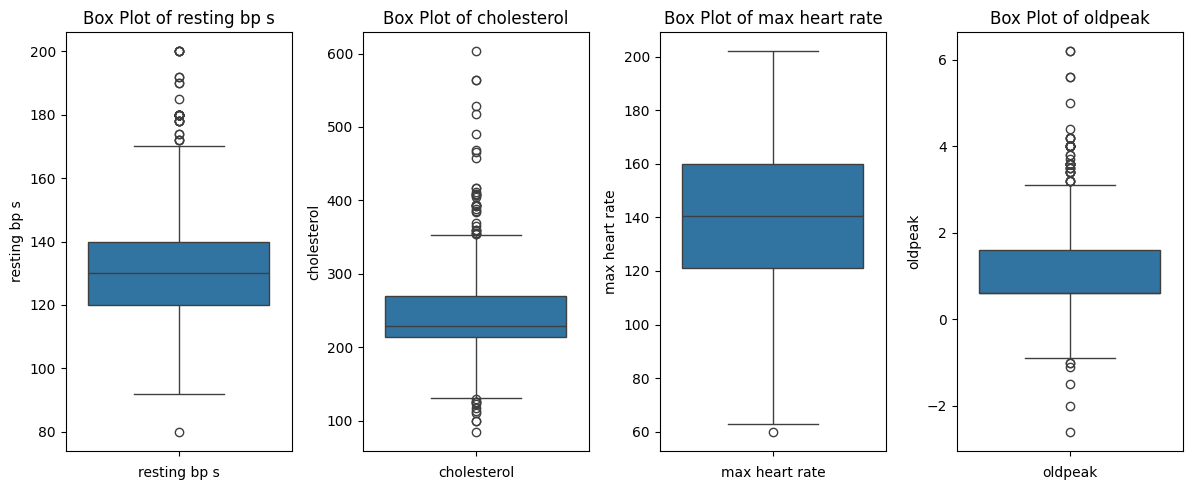

In [20]:
# Selecting only the numerical features with zero values replaced
numerical_data_replaced = data[columns_to_replace]

# Box plots for numerical features after replacing zero values with median
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_data_replaced.columns):
    plt.subplot(1, 5, i+1)
    sns.boxplot(numerical_data_replaced[feature])
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()


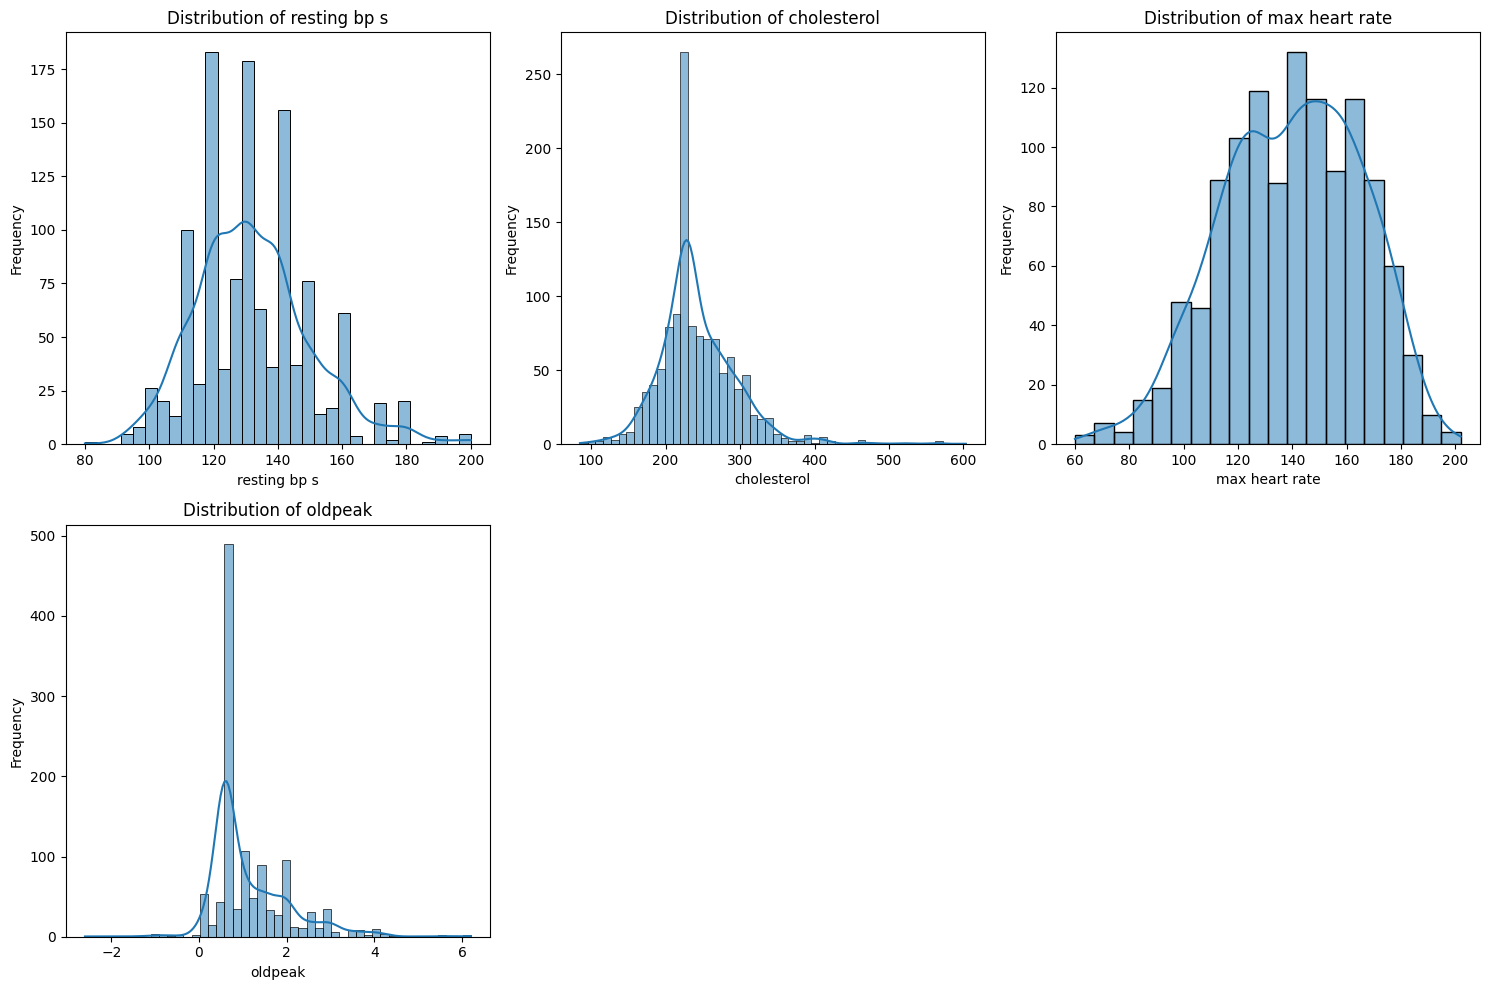

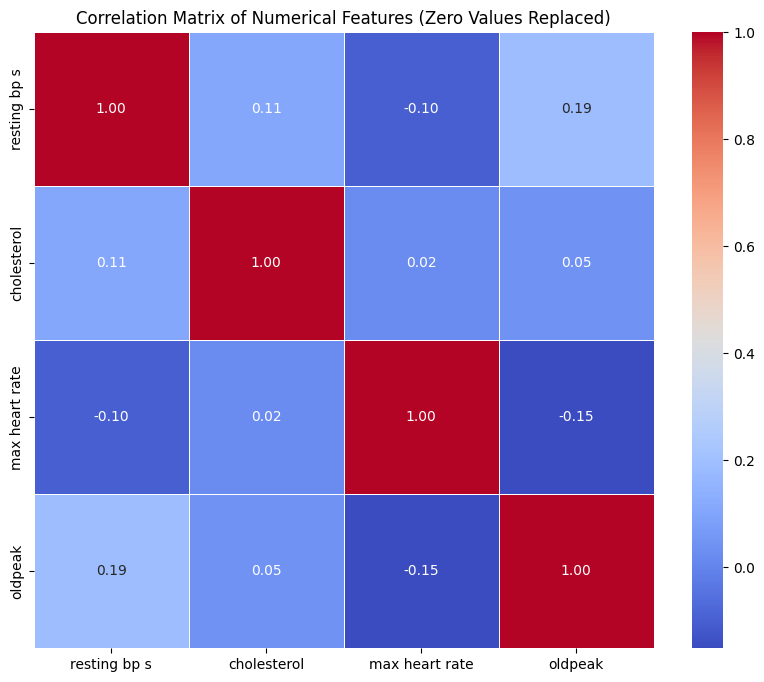

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features after replacing zero values with median
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_data_replaced.columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(numerical_data_replaced[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Calculate correlation matrix
correlation_matrix = numerical_data_replaced.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features (Zero Values Replaced)')
plt.show()


In [23]:
correlation_matrix

,resting bp s,cholesterol,max heart rate,oldpeak
resting bp s,1.000000,0.105512,-0.099998,0.188555
cholesterol,0.105512,1.000000,0.020743,0.046586
max heart rate,-0.099998,0.020743,1.000000,-0.151273
oldpeak,0.188555,0.046586,-0.151273,1.000000


The correlation matrix reveals weak correlations between the numerical features, suggesting low multicollinearity. Multicollinearity occurs when features are highly correlated, potentially leading to unstable estimates in regression models. In this case, the weak correlations indicate that the numerical features are relatively independent of each other, reducing the risk of multicollinearity issues in predictive modeling.

In [32]:
# Check number of unique categories in each categorical variable
unique_counts = categorical_data.apply(lambda x: len(x.unique()))

print(unique_counts)


sex                    2
chest pain type        4
fasting blood sugar    2
resting ecg            3
exercise angina        2
ST slope               4
dtype: int64


In [38]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
import pandas as pd

# Selecting only the categorical features
categorical_columns = ['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg', 'exercise angina', 'ST slope','target']
categorical_data = data[categorical_columns]



# Encoding categorical variables
encoded_categorical_data = pd.DataFrame()

# One-hot encode categorical variables with more than two categories
for column in categorical_data.columns:
    if categorical_data[column].nunique() > 2:
        encoder = OneHotEncoder(drop='first')
        encoded_values = encoder.fit_transform(categorical_data[[column]])
        encoded_df = pd.DataFrame(encoded_values.toarray(), columns=encoder.get_feature_names_out([column]))
        encoded_categorical_data = pd.concat([encoded_categorical_data, encoded_df], axis=1)

# Label encode binary categorical variables
label_encoder = LabelEncoder()
binary_categorical_data = pd.DataFrame()
for column in categorical_data.columns:
    if categorical_data[column].nunique() == 2:
        encoded_values = label_encoder.fit_transform(categorical_data[column])
        binary_categorical_data[column] = encoded_values

# Combine numerical data, encoded categorical data, and binary categorical data
clean_data = pd.concat([numerical_data_replaced, encoded_categorical_data, binary_categorical_data], axis=1)

# Display the first few rows of the clean dataset
print(clean_data.head())


   resting bp s  cholesterol  max heart rate  oldpeak  chest pain type_2  \
0           140          289             172      0.6                1.0   
1           160          180             156      1.0                0.0   
2           130          283              98      0.6                1.0   
3           138          214             108      1.5                0.0   
4           150          195             122      0.6                0.0   

   chest pain type_3  chest pain type_4  resting ecg_1  resting ecg_2  \
0                0.0                0.0            0.0            0.0   
1                1.0                0.0            0.0            0.0   
2                0.0                0.0            1.0            0.0   
3                0.0                1.0            0.0            0.0   
4                1.0                0.0            0.0            0.0   

   ST slope_1  ST slope_2  ST slope_3  sex  fasting blood sugar  \
0         1.0         0.0         0.0

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Splitting into features (X) and target variable (y)
X = clean_data.drop('target', axis=1)
y = clean_data['target']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and fitting the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predicting on the testing set
y_pred = log_reg.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", accuracy)

# Generating classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Testing Accuracy: 0.8571428571428571
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       107
           1       0.86      0.89      0.87       131

    accuracy                           0.86       238
   macro avg       0.86      0.85      0.86       238
weighted avg       0.86      0.86      0.86       238



Based on the logistic regression model you trained earlier, it achieved an accuracy of approximately 85.7% on the testing dataset. The classification report indicates precision, recall, and F1-score for both classes (0 and 1).

From the provided classification report, we can make the following predictions for the given dataset:

1. **Precision**: The precision for class 0 (no heart disease) is 0.85, which means that out of all the instances predicted as class 0, approximately 85% are actually class 0. Similarly, the precision for class 1 (presence of heart disease) is 0.86, indicating that around 86% of the instances predicted as class 1 are actually class 1.

2. **Recall**: The recall for class 0 is 0.82, meaning that out of all the actual instances of class 0, approximately 82% were correctly predicted as class 0. Similarly, the recall for class 1 is 0.89, indicating that around 89% of the actual instances of class 1 were correctly predicted as class 1.

3. **F1-score**: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. The F1-score for class 0 is 0.84, and for class 1, it is 0.87.

4. **Accuracy**: The overall accuracy of the model is approximately 85.7%. This indicates the proportion of correctly classified instances out of the total instances.

Based on these metrics, we can predict that the logistic regression model performs reasonably well on the given dataset, with balanced performance between the two classes. It correctly predicts the presence or absence of heart disease for most instances. However, further analysis and model evaluation may be required depending on the specific requirements and goals of the project.

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Splitting into features (X) and target variable (y)
X = clean_data.drop('target', axis=1)
y = clean_data['target']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and fitting the Random Forest Classifier model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predicting on the testing set
y_pred = rf_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", accuracy)

# Generating classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Testing Accuracy: 0.9495798319327731
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       107
           1       0.95      0.96      0.95       131

    accuracy                           0.95       238
   macro avg       0.95      0.95      0.95       238
weighted avg       0.95      0.95      0.95       238



The Random Forest Classifier achieved a significantly higher testing accuracy of approximately 94.96% compared to the logistic regression model. Let's interpret the classification report for the Random Forest Classifier:

1. **Precision**: 
   - Precision for class 0 (no heart disease) is 0.95, indicating that out of all instances predicted as class 0, approximately 95% are actually class 0.
   - Precision for class 1 (presence of heart disease) is also 0.95, suggesting that around 95% of instances predicted as class 1 are actually class 1.

2. **Recall**:
   - Recall for class 0 is 0.93, meaning that out of all actual instances of class 0, approximately 93% were correctly predicted as class 0.
   - Recall for class 1 is 0.96, indicating that around 96% of actual instances of class 1 were correctly predicted as class 1.

3. **F1-score**:
   - The F1-score, which is the harmonic mean of precision and recall, is 0.94 for class 0 and 0.95 for class 1. This suggests a balance between precision and recall for both classes.

4. **Accuracy**:
   - The overall accuracy of the Random Forest Classifier is approximately 94.96%, indicating the proportion of correctly classified instances out of the total instances.

Overall, the Random Forest Classifier demonstrates strong performance on the given dataset, with high precision, recall, and F1-score for both classes. It effectively distinguishes between instances with and without heart disease, resulting in a high overall accuracy. This suggests that the Random Forest Classifier may be a suitable model for predicting heart disease based on the provided features.

In [41]:
import xgboost as xgb

# Initializing and fitting the XGBoost Classifier model
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)

# Predicting on the testing set
y_pred_xgb = xgb_classifier.predict(X_test)

# Calculating accuracy for XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Testing Accuracy:", accuracy_xgb)

# Generating classification report for XGBoost
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Testing Accuracy: 0.9411764705882353
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       107
           1       0.94      0.95      0.95       131

    accuracy                           0.94       238
   macro avg       0.94      0.94      0.94       238
weighted avg       0.94      0.94      0.94       238



The XGBoost classifier achieved a testing accuracy of approximately 94.12%. Let's interpret the classification report for XGBoost and compare it with Random Forest and Logistic Regression:

**XGBoost:**
- **Precision**: 
  - Precision for class 0 (no heart disease) is 0.94, indicating that out of all instances predicted as class 0, approximately 94% are actually class 0.
  - Precision for class 1 (presence of heart disease) is also 0.94, suggesting that around 94% of instances predicted as class 1 are actually class 1.

- **Recall**:
  - Recall for class 0 is 0.93, meaning that out of all actual instances of class 0, approximately 93% were correctly predicted as class 0.
  - Recall for class 1 is 0.95, indicating that around 95% of actual instances of class 1 were correctly predicted as class 1.

- **F1-score**:
  - The F1-score, which is the harmonic mean of precision and recall, is 0.93 for class 0 and 0.95 for class 1. This suggests a balance between precision and recall for both classes.

- **Accuracy**:
  - The overall accuracy of the XGBoost classifier is approximately 94.12%.

**Comparison with Random Forest and Logistic Regression:**
- Both XGBoost and Random Forest achieved high accuracy and similar precision, recall, and F1-score values for both classes.
- Logistic Regression achieved a lower accuracy compared to XGBoost and Random Forest, indicating that tree-based models (Random Forest and XGBoost) are more suitable for this classification task.
- XGBoost and Random Forest outperformed Logistic Regression in terms of accuracy, precision, recall, and F1-score, suggesting that ensemble learning methods are more effective for this dataset.
- XGBoost and Random Forest have similar performance metrics, with XGBoost having slightly lower accuracy but similar precision, recall, and F1-score values.

In summary, both XGBoost and Random Forest classifiers demonstrate strong performance on the given dataset, with similar accuracy and other evaluation metrics. They outperform Logistic Regression, indicating their superiority in this classification task. The choice between XGBoost and Random Forest may depend on factors such as computational efficiency, interpretability, and specific requirements of the application.

A relevant business question that can be addressed using the above classification models is:

**"Given the demographic and health indicators of individuals, can we accurately predict the likelihood of heart disease occurrence?"**

By leveraging machine learning models such as Logistic Regression, Random Forest, and XGBoost, we can develop predictive models to assess the risk of heart disease based on various factors such as age, sex, chest pain type, resting blood pressure, cholesterol level, fasting blood sugar, resting electrocardiogram results, maximum heart rate achieved, exercise-induced angina, and other relevant features.

Using these models, businesses in the healthcare industry, insurance sector, or wellness programs can:

1. **Identify High-Risk Individuals**: Predictive models can identify individuals who are at high risk of developing heart disease based on their health profile and demographic information. This enables targeted interventions and proactive healthcare management strategies for at-risk populations.

2. **Personalized Risk Assessment**: Businesses can offer personalized risk assessment services to individuals, providing them with insights into their likelihood of developing heart disease. This empowers individuals to make informed decisions about their lifestyle, diet, and medical care to mitigate their risk factors.

3. **Optimize Healthcare Resource Allocation**: Healthcare providers can use predictive models to allocate resources efficiently, prioritizing preventive care and interventions for individuals with a higher predicted risk of heart disease. This helps optimize resource utilization and improve patient outcomes.

4. **Develop Tailored Intervention Programs**: Businesses can design tailored intervention programs, including lifestyle modification initiatives, medication adherence support, and disease management strategies, based on individuals' predicted risk profiles. These programs can be customized to address specific risk factors and improve overall cardiovascular health.

Overall, leveraging predictive modeling techniques for heart disease risk assessment enables businesses to enhance preventive care, optimize resource allocation, and improve health outcomes for individuals, ultimately contributing to better population health and healthcare management.